In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS) / "images"

In [3]:
def is_cat(x):
    return x[0].isupper()

In [9]:
def create_dls():
     return ImageDataLoaders.from_name_func(
        path, get_image_files(path), valid_pct=0.2, seed=42,
        label_func=is_cat, item_tfms=Resize(224))

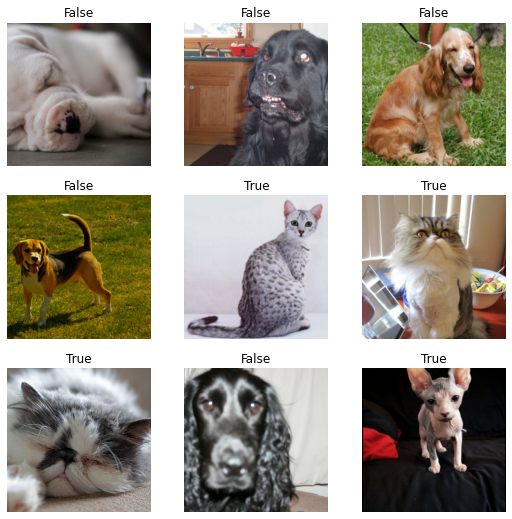

In [10]:
dls = create_dls()
dls.show_batch()

In [11]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.dls = create_dls()

In [12]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.148953,0.022839,0.007442,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.055623,0.020046,0.008796,00:12


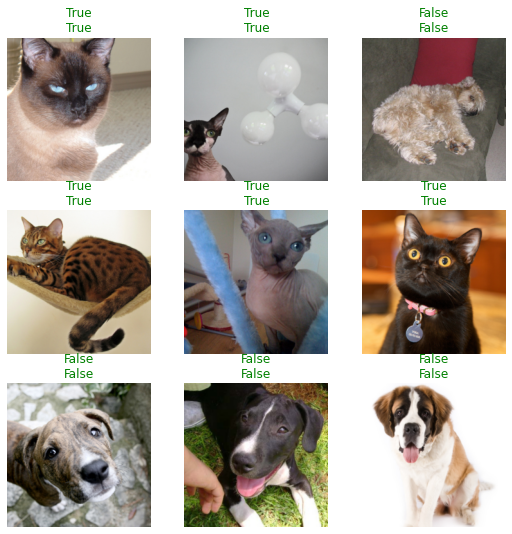

In [13]:
learn.show_results()